<p style="text-align:center; font-size:32px; font-weight:bold; color:blue;">
    Binary Classification (Categorical Data): Stroke Prediction Model
</p>


## Table of Contents

- [Business Understanding](#1:-business-understanding)
- [Analytical Approach, Data Requirement/Collection/Understanding](#2:-analytical-approach-data-requirement-collection-understanding)
- [Exploratory Data Analysis (EDA)](#3:-Exploratory-Data-Analysis (EDA))
- [Data Preparation (Python or SQL)](#4:-Data-Preparation-(Python-or-SQL)
- [Model Development](#6:-Model-Development)
- [Model Evaluation](#6:-Model-Evaluation)
- [Model Deployment](#7:-Evaluation)



## 1: Business Understanding

The goal is to predict likelihood of stroke using various patient health signals
and subsequently identify which factors contribute to stroke so that healthcare practitioners can better understand how to control this in patients


## 2: Analytical Approach, Data Requirement/Collection/Understanding

### 2.1. Analytical Approach

Binary-Classification Modelling with XGBoost, Random forests, k-nearest neighbours, ANN and log regression

### 2.2. Data Requirements

Require labelled dataset with various patient factors and their effect on Stroke in the patient. Even split of patients diagnosed with Stroke and those who are not. If dataset is imbalanced, methods such as SMOTE analysis will be required to balance the dataset

### 2.3. Data Collection

Data will be extracted from a stroke prediction dataset obtained from an online medical repository

The dataset contains 5110 datapoint composed of 2995 females and 2115 females

### 2.4. Data Attributes

| **Variable**          | **Description**                                             |
|-----------------------|-------------------------------------------------------------|
| id                    | Patient ID number                                          |
| gender                | Patient sex (male or female)                              |
| age                   | Age of the patient                                        |
| hypertension          | Patient hypertension status ("0" - No, "1" - Yes)        |
| ever_married          | Marital status ("Yes" or "No")                            |
| work_type             | Patient occupation                                        |
| Residence_type        | Rural or urban living location                            |
| avg_glucose_level     | Patient's blood sugar level                               |
| bmi                   | Patient's body mass index                                |
| smoking_status        | Status of person's smoking habits                         |
| Stroke                | Previous history of stroke ("0" - no stroke, "1" - stroke)|


### 2.5. Data Understanding (Descriptive statistics/data shape etc.)

In [15]:
# Read the dataset

import pandas as pd  # import pandas module
pd.set_option('display.max_columns', None) # specify how many columns you want to show
df_stroke = pd.read_csv('Stroke.csv') # read the file into a pandas dataframe
df_stroke # view dataframe containing the data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,Yes,No,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,No,No,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [16]:
# Check the datatype of each column to identify if columns have numerical or categorical variables which is important before cleaning the data
df_stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [17]:
# Find the number of rows and columns the dataset contains
df_stroke.shape
# as can be seen the dataset contains a total of 5110 rows and 12 columns 

(5110, 12)

## 3: Exploratory Data Analysis (EDA)

In [19]:
# determine unique categories within each categorical variable
# seperate only the categorical columns
df_stroke_categorical = df_stroke[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']]

# Create an empty dictionary to store value counts for each column
value_counts_dict = {}

# Iterate over each column in the DataFrame
for column in df_stroke_categorical.columns:
    # Apply value_counts() to the column and store the result in the dictionary
    value_counts_dict[column] = df_stroke_categorical[column].value_counts()

# Convert the dictionary to a DataFrame for easy viewing
value_counts_df = pd.DataFrame.from_dict(value_counts_dict, orient='index').transpose()

# Display the DataFrame of value counts for all columns
value_counts_df

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
Female,2994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Male,2115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No,NaN,4612.0,4834.0,1757.0,NaN,NaN,NaN,NaN
Yes,NaN,498.0,276.0,3353.0,NaN,NaN,NaN,NaN
Private,NaN,NaN,NaN,NaN,2925.0,NaN,NaN,NaN
Self-employed,NaN,NaN,NaN,NaN,819.0,NaN,NaN,NaN
children,NaN,NaN,NaN,NaN,687.0,NaN,NaN,NaN
Govt_job,NaN,NaN,NaN,NaN,657.0,NaN,NaN,NaN
Never_worked,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN


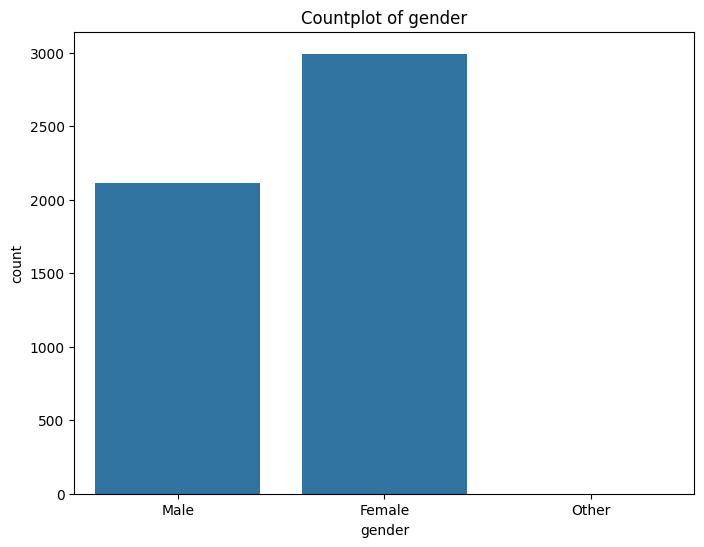

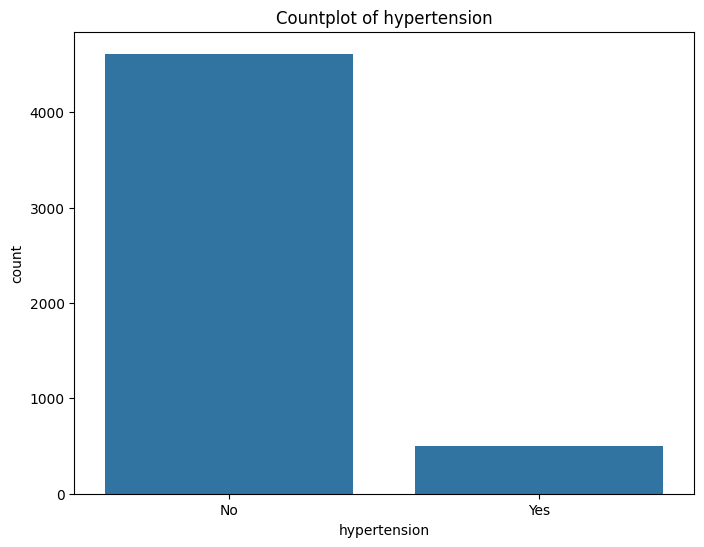

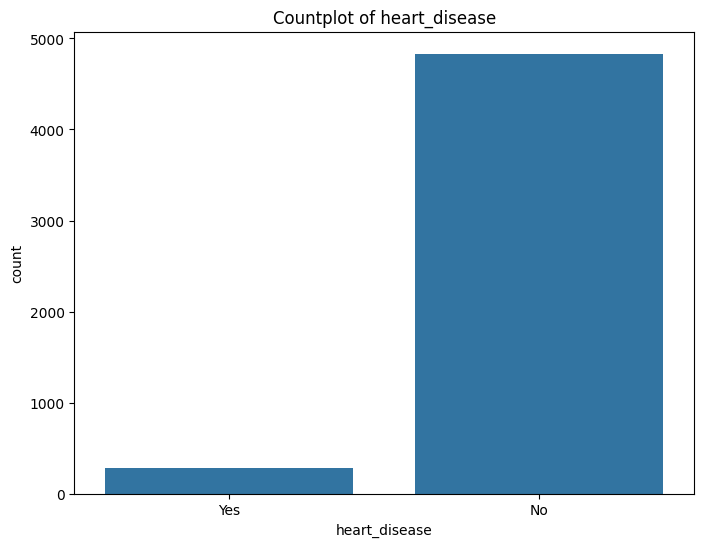

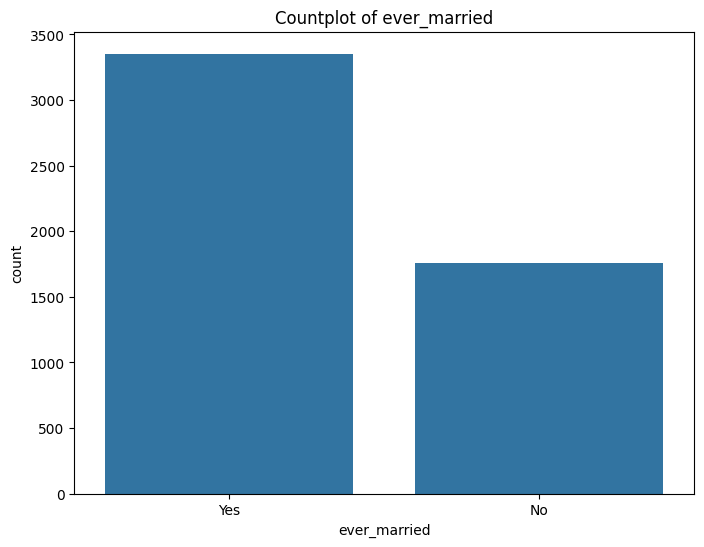

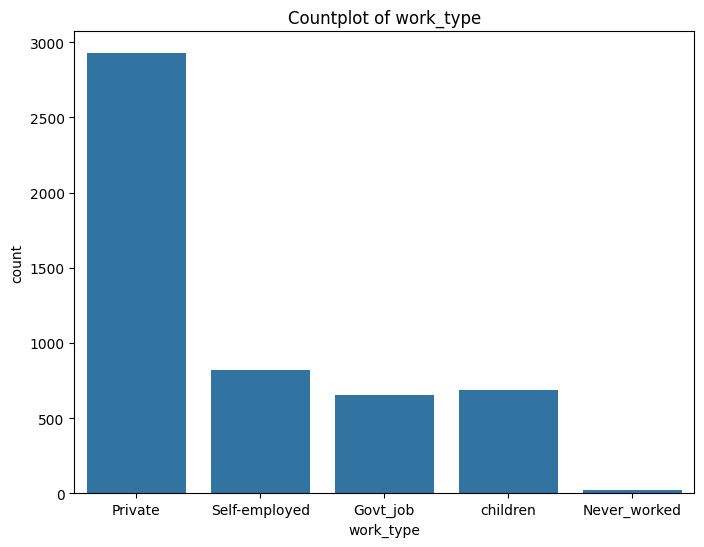

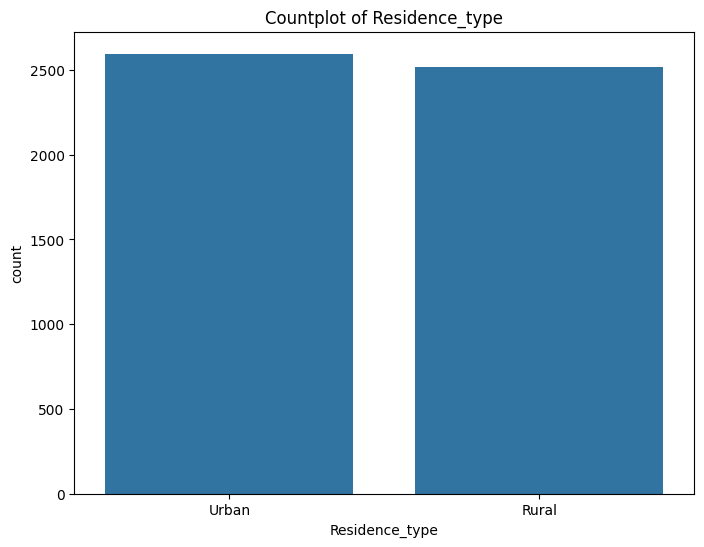

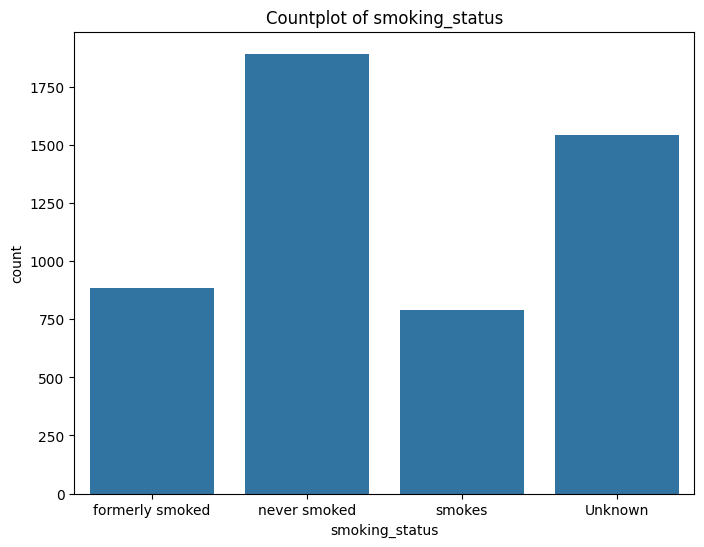

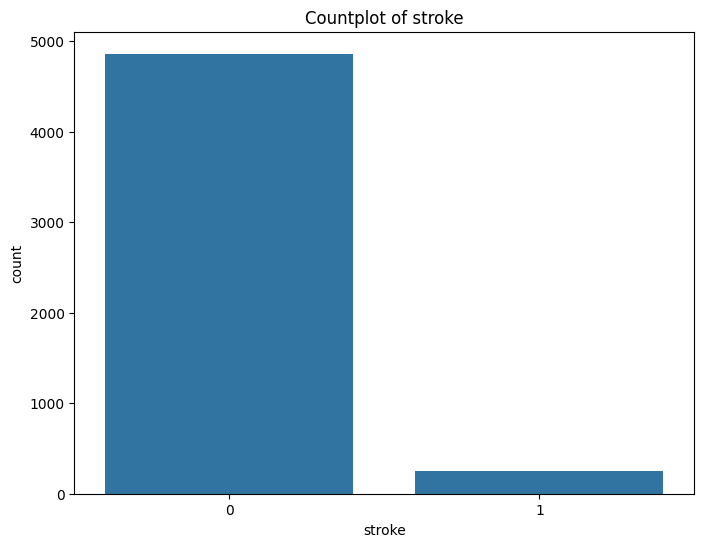

In [20]:
#countplot for categorical columns

import seaborn as sns
import matplotlib.pyplot as plt

# Set up a loop to create countplots for each categorical column
for column in df_stroke_categorical:
    plt.figure(figsize=(8, 6))  # Set the size of each individual plot
    sns.countplot(x=column, data=df_stroke_categorical)  # Create the countplot for the current column
    plt.title(f'Countplot of {column}')  # Set the title of the plot
    plt.xlabel(column)  # Set the label for the x-axis
    plt.show()  # Display the plot

In [21]:
# the data is imbalanced with more cases of people having stroke than not having stroke
# most people in the study smoke or their smoking status is undisclosed
# Most people in the study work privately
# Most people in the study have been married and have no history of heart disease
# most people in the study have no history of hypertension
# there are mostly woman in the study

In [22]:
# examine how gender variable relates to the target
pd.crosstab(df_stroke_categorical['gender'], df_stroke_categorical['stroke'], normalize='index')

stroke,0,1
gender,,
Female,0.952906,0.047094
Male,0.948936,0.051064
Other,1.000000,0.000000


In [23]:
# examine how hypertension variable relates to the target
pd.crosstab(df_stroke_categorical['hypertension'], df_stroke_categorical['stroke'], normalize='index')

stroke,0,1
hypertension,,
No,0.960321,0.039679
Yes,0.867470,0.132530


In [24]:
# examine how heart_disease variable relates to the target
pd.crosstab(df_stroke_categorical['heart_disease'], df_stroke_categorical['stroke'], normalize='index')

stroke,0,1
heart_disease,,
No,0.958213,0.041787
Yes,0.829710,0.170290


In [25]:
# heart disease has a strong relation to stroke

In [26]:
# examine how ever_married variable relates to the target
pd.crosstab(df_stroke_categorical['ever_married'], df_stroke_categorical['stroke'], normalize='index')

stroke,0,1
ever_married,,
No,0.983495,0.016505
Yes,0.934387,0.065613


In [27]:
# examine how smoking_status variable relates to the target
pd.crosstab(df_stroke_categorical['smoking_status'], df_stroke_categorical['stroke'], normalize='index')

stroke,0,1
smoking_status,,
Unknown,0.969560,0.030440
formerly smoked,0.920904,0.079096
never smoked,0.952431,0.047569
smokes,0.946768,0.053232


In [28]:
# examine how Residence_type variable relates to the target
pd.crosstab(df_stroke_categorical['Residence_type'], df_stroke_categorical['stroke'], normalize='index')

stroke,0,1
Residence_type,,
Rural,0.954654,0.045346
Urban,0.947997,0.052003


In [29]:
#now seperate the numerical data into dataframe

df_stroke_numeric = df_stroke[['age','bmi','avg_glucose_level']]

df_stroke_numeric.describe()

,age,bmi,avg_glucose_level
count,5110.000000,4909.000000,5110.000000
mean,43.226614,28.893237,106.147677
std,22.612647,7.854067,45.283560
min,0.080000,10.300000,55.120000
25%,25.000000,23.500000,77.245000
50%,45.000000,28.100000,91.885000
75%,61.000000,33.100000,114.090000
max,82.000000,97.600000,271.740000


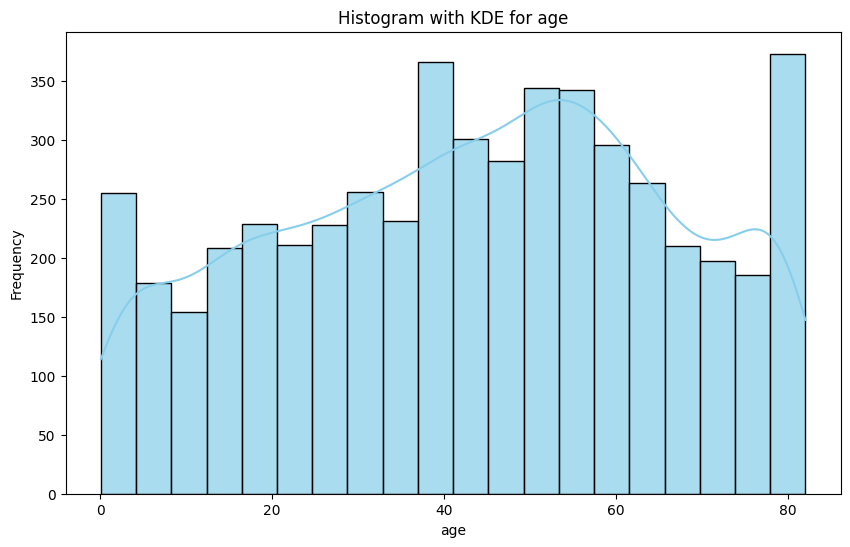

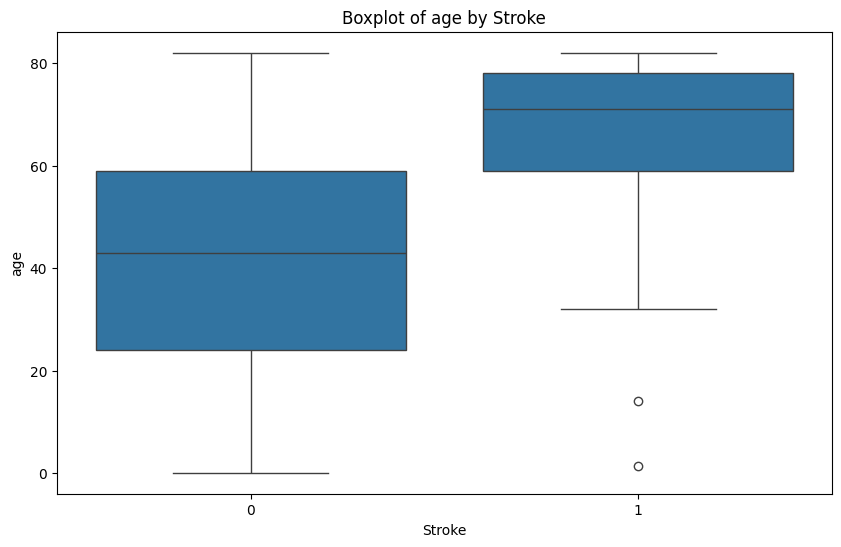

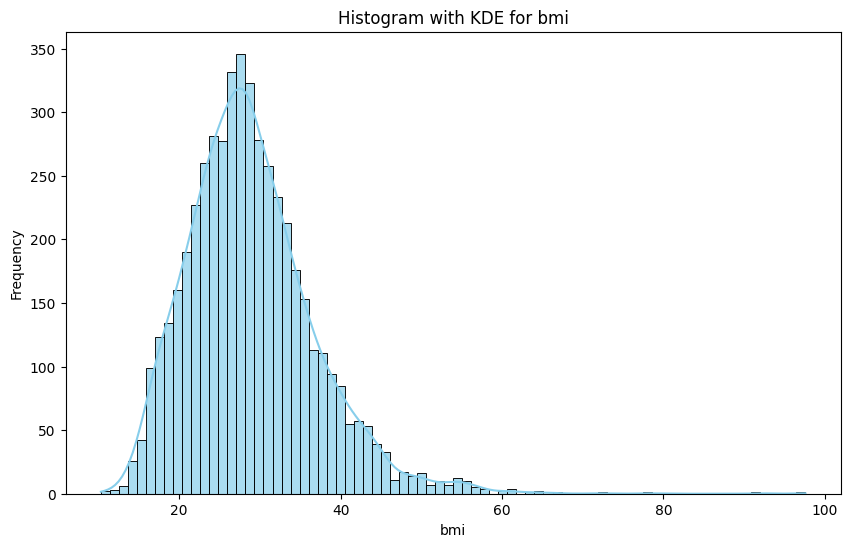

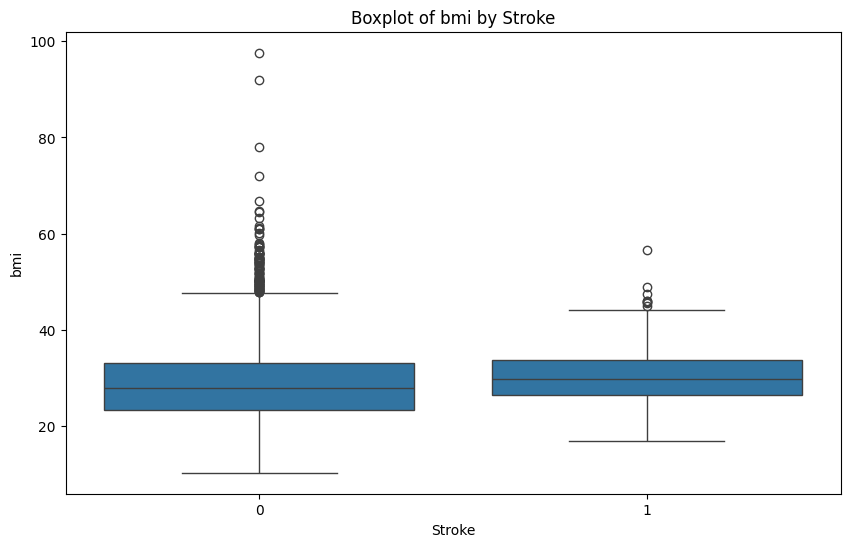

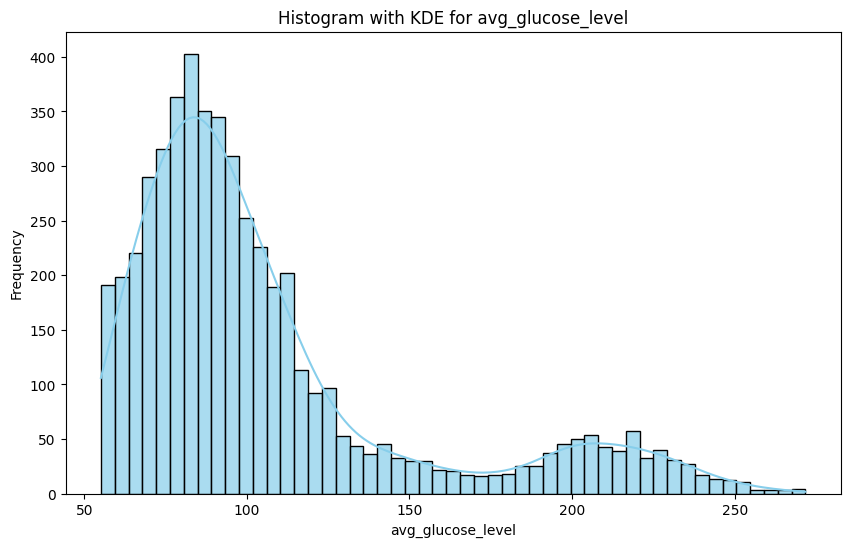

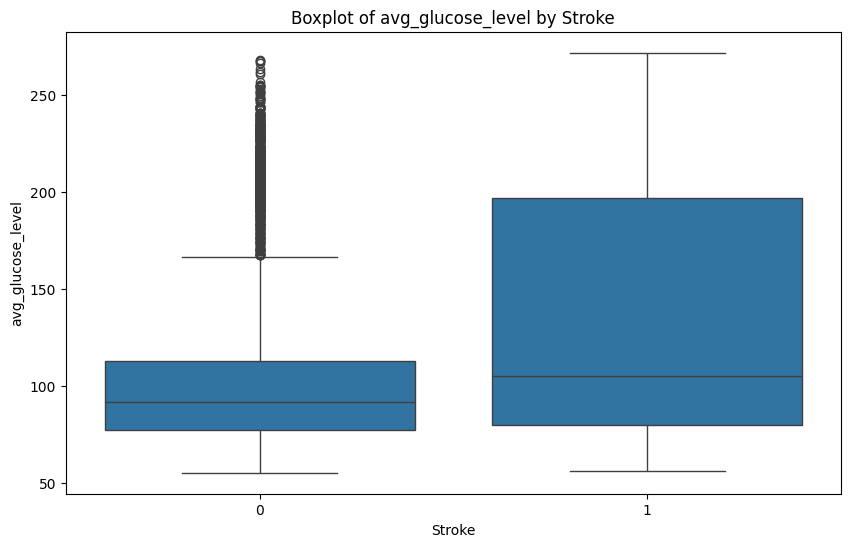

In [30]:
# plot histogram or barplots to visualize numeric data
# Loop over each numeric column in df_stroke_categorical to create visualizations
for column in df_stroke_numeric.columns:
    plt.figure(figsize=(10, 6))  # Set the size of each individual plot
    
    # Plot a histogram with kernel density estimation (kde) for numeric data
    sns.histplot(data=df_stroke_numeric, x=column, kde=True, color='skyblue', alpha=0.7)
    plt.title(f'Histogram with KDE for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    # Plot boxplot to visualize the relationship with the 'stroke' column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_stroke_categorical['stroke'], y=column, data=df_stroke_numeric)
    plt.title(f'Boxplot of {column} by Stroke')
    plt.xlabel('Stroke')
    plt.ylabel(column)
    plt.show()
    

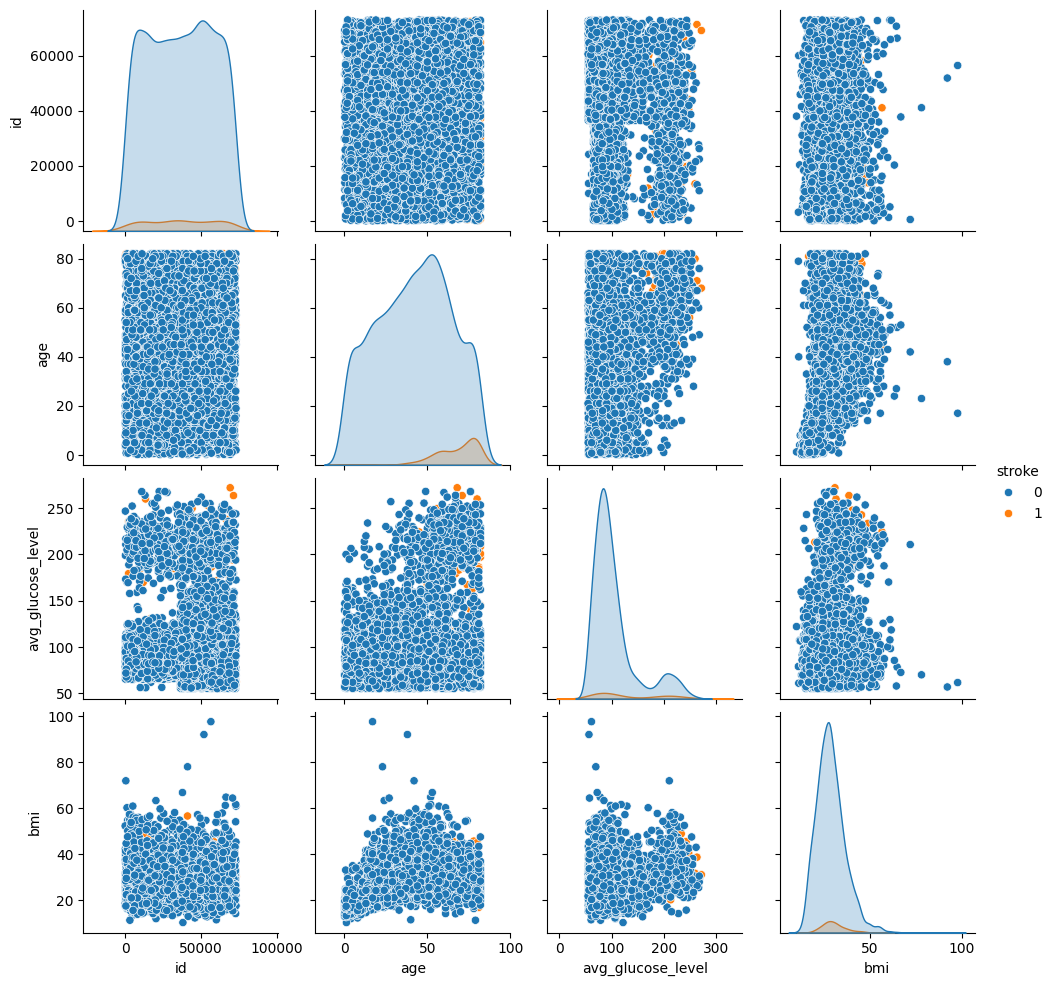

In [31]:
# combined analysis categorical and numerical 

sns.pairplot(df_stroke, hue='stroke')
plt.show()

## 4: Data Preparation (Python or SQL)

####               4.1. Data Imputation & Cleaning

In [34]:
# find a summary of the dataset
import pandas as pd
pd.set_option('display.max_rows', 40)
df_stroke.info()

# all columns have non-null values
# no issue with dealing with non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 479.2+ KB


In [35]:
nan_counts = df_stroke.isna().sum()

# Display the counts of NaN values for each column
print("NaN counts per column:")
print(nan_counts)



NaN counts per column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [36]:
# need to address the Nan values in the BMI column
# very difficult to establish BMI's of missing people so will need to drop all rows from dataset

# Drop rows with NaN values in the 'value' column (modify inplace)
df_stroke.dropna(subset=['bmi'], inplace=True)
nan_counts = df_stroke.isna().sum()
print(nan_counts)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [37]:
# to prevent data spillage need to do train, test, validation split here

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE



# Separate features (X) and target (y)
X = df_stroke.drop('stroke', axis=1)  # Features
y = df_stroke['stroke']  # Target

# Split the dataset into training and testing sets (needs to be done before balancing dataset)
# sample stratification done to ensure both classes appear in each of the splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

# Split the training set into validation and train set
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.2,stratify=y_train, random_state=42)

In [38]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Define features and target
features = ['gender', 'smoking_status', 'hypertension', 'work_type', 'Residence_type', 'ever_married', 'heart_disease']
target = 'stroke'
features2 = ['age', 'avg_glucose_level', 'bmi']

# Train set
X_train_E = X_train_1[features]  # Extract features for training

# Initialize OneHotEncoder
# use the one instance on the test,validation, train set
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit encoder on the training set and transform it (only categorical values)
encoded_features_train = one_hot_encoder.fit_transform(X_train_E)
encoded_df_train = pd.DataFrame(encoded_features_train, columns=one_hot_encoder.get_feature_names_out(features))

# Ensure consistent indexing
X_train_E.reset_index(drop=True, inplace=True)
encoded_df_train.reset_index(drop=True, inplace=True)
X_train_1[features2].reset_index(drop=True, inplace=True)
y_train_1.reset_index(drop=True, inplace=True)

# Concatenate the encoded DataFrame (encoded_df_train) with the target (y_train) and the numerial values that were excluded
df_stroke_train_encoded = pd.concat([encoded_df_train, X_train_1[features2].reset_index(drop=True), y_train_1.reset_index(drop=True)], axis=1)

# Validation set
X_val_E = X_val[features]  # Extract features for validation

# Transform validation set using the same encoder
encoded_features_val = one_hot_encoder.transform(X_val_E)
encoded_df_val = pd.DataFrame(encoded_features_val, columns=one_hot_encoder.get_feature_names_out(features))

# Ensure consistent indexing
X_val_E.reset_index(drop=True, inplace=True)
encoded_df_val.reset_index(drop=True, inplace=True)
X_val[features2].reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

# Concatenate the encoded DataFrame (encoded_df_val) with the target (y_val) and numerical features that were left out
df_stroke_val_encoded = pd.concat([encoded_df_val, X_val[features2].reset_index(drop=True), y_val.reset_index(drop=True)], axis=1)

# Test set
X_test_E = X_test[features]  # Extract features for test

# Transform test set using the same encoder
encoded_features_test = one_hot_encoder.transform(X_test_E)
encoded_df_test = pd.DataFrame(encoded_features_test, columns=one_hot_encoder.get_feature_names_out(features))

# Ensure consistent indexing
X_test_E.reset_index(drop=True, inplace=True)
encoded_df_test.reset_index(drop=True, inplace=True)
X_test[features2].reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Concatenate the encoded DataFrame (encoded_df_test) with the target (y_test) and numerical features that were left out
df_stroke_test_encoded = pd.concat([encoded_df_test, X_test[features2].reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

# Print the encoded and concatenated DataFrame for the training set
df_stroke_train_encoded


,gender_Female,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_No,hypertension_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,heart_disease_No,heart_disease_Yes,age,avg_glucose_level,bmi,stroke
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,41.0,102.89,37.2,0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,61.0,69.91,37.1,0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,81.00,20.7,0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,32.0,62.60,25.1,0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,42.0,94.38,34.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,21.0,90.16,28.9,0
3137,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,54.0,108.34,31.9,0
3138,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,17.0,68.49,33.2,0
3139,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,54.0,96.97,29.1,1


#### 4.2. Outlier Identification and Removal

In [40]:
import pandas as pd

# Define a function to remove outliers based on IQR
def remove_outliers(df, features2):
    X = df[features2]
    
    # Compute Q1 (25th percentile) and Q3 (75th percentile) for numerical features
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows with outliers
    is_outlier = ((X < lower_bound) | (X > upper_bound)).any(axis=1)
    return df[~is_outlier]

# Train set
df_cleaned_train = remove_outliers(df_stroke_train_encoded, features2)


# Validation set
df_cleaned_val = remove_outliers(df_stroke_val_encoded, features2)


# Test set
df_cleaned_test = remove_outliers(df_stroke_test_encoded, features2)


df_cleaned_train



,gender_Female,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_No,hypertension_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,heart_disease_No,heart_disease_Yes,age,avg_glucose_level,bmi,stroke
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,41.0,102.89,37.2,0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,61.0,69.91,37.1,0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,81.00,20.7,0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,32.0,62.60,25.1,0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,42.0,94.38,34.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,21.0,90.16,28.9,0
3137,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,54.0,108.34,31.9,0
3138,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,17.0,68.49,33.2,0
3139,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,54.0,96.97,29.1,1


####               4.3. Feature Engineering (Selection)

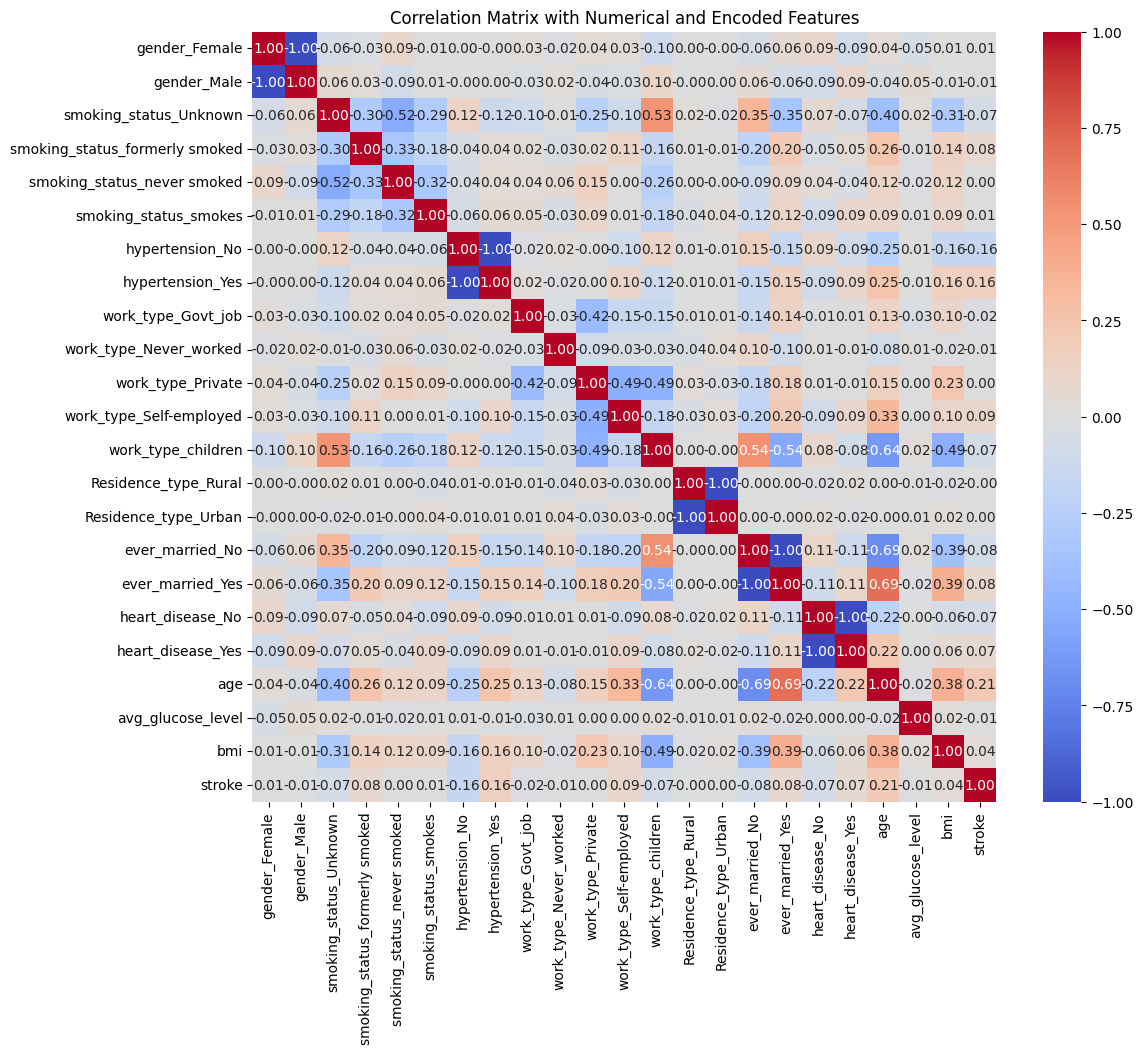

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix
corr_matrix = df_cleaned_train.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Numerical and Encoded Features')
plt.show()


In [43]:
# there seems to be multicollinearity between features e.g. age and marital status
# therefore candidate for PCA

In [44]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Assuming df_cleaned_train is your DataFrame and 'stroke' is the target column (categorical)
# Separate features and target variable
X = df_cleaned_train.drop(columns=['stroke'])  # Drop the target column to get feature set
y = df_cleaned_train['stroke']  # Categorical target variable

# Compute mutual information between each feature and the target
mi = mutual_info_classif(X, y)

# Create a Series from the mutual information scores
mi_series = pd.Series(mi, index=X.columns, name="Mutual Information")

# Sort features by mutual information in descending order
mi_series = mi_series.sort_values(ascending=False)

# Print the features ranked by mutual information
print("Features ranked by mutual information:")
print(mi_series)



Features ranked by mutual information:
age                               0.026903
hypertension_Yes                  0.007138
Residence_type_Urban              0.006547
hypertension_No                   0.004297
work_type_Never_worked            0.003524
gender_Male                       0.002686
work_type_Govt_job                0.002475
smoking_status_formerly smoked    0.002084
gender_Female                     0.001814
work_type_Private                 0.001200
smoking_status_never smoked       0.000494
bmi                               0.000481
heart_disease_Yes                 0.000421
ever_married_No                   0.000334
work_type_children                0.000307
Residence_type_Rural              0.000153
heart_disease_No                  0.000118
smoking_status_smokes             0.000000
ever_married_Yes                  0.000000
smoking_status_Unknown            0.000000
avg_glucose_level                 0.000000
work_type_Self-employed           0.000000
Name: Mutual In

In [45]:
Median = mi_series.median()
print(Median)

# this will be used as the threshold indicator

0.0004875693370554046


In [46]:
# an alternative method for filtering features

from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
importances_series = pd.Series(importances, index=X.columns, name="Feature Importance")
importances_series = importances_series.sort_values(ascending=False)

print("Features ranked by importance:")
print(importances_series)

Features ranked by importance:
bmi                               0.235565
avg_glucose_level                 0.232900
age                               0.230475
smoking_status_formerly smoked    0.022709
gender_Female                     0.022698
Residence_type_Urban              0.022211
work_type_Private                 0.022110
hypertension_No                   0.021953
smoking_status_never smoked       0.020827
Residence_type_Rural              0.020205
work_type_Self-employed           0.019847
gender_Male                       0.019394
smoking_status_smokes             0.018220
hypertension_Yes                  0.017057
smoking_status_Unknown            0.015943
work_type_Govt_job                0.012551
ever_married_No                   0.012058
heart_disease_No                  0.010924
ever_married_Yes                  0.010706
heart_disease_Yes                 0.010409
work_type_children                0.001164
work_type_Never_worked            0.000072
Name: Feature Importanc

In [47]:
# tree based models for feature selection are better fitted for imbalanced datasets
# will use this to verify feature selection
# we will use a 10% of max series score
# 10% of 0.24 = 0.024 - anything less will be excluded baring in mind tacit knowledge of healthcare
# will remove work_type_Never_worked, work_type_children

In [48]:
# Define columns to drop
columns_to_drop = ['work_type_Never_worked', 'work_type_children']

# Drop columns from the training set (without inplace=True)
df_cleaned_train = df_cleaned_train.drop(columns=columns_to_drop, errors='ignore')

# Drop columns from the validation set (without inplace=True)
df_cleaned_val = df_cleaned_val.drop(columns=columns_to_drop, errors='ignore')

# Drop columns from the test set (without inplace=True)
df_cleaned_test = df_cleaned_test.drop(columns=columns_to_drop, errors='ignore')

# Check the resulting DataFrames
print("Training set columns after drop:")
print(df_cleaned_train.columns)

print("\nValidation set columns after drop:")
print(df_cleaned_val.columns)

print("\nTest set columns after drop:")
print(df_cleaned_test.columns)



Training set columns after drop:
Index(['gender_Female', 'gender_Male', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'hypertension_No', 'hypertension_Yes',
       'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
       'Residence_type_Rural', 'Residence_type_Urban', 'ever_married_No',
       'ever_married_Yes', 'heart_disease_No', 'heart_disease_Yes', 'age',
       'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')

Validation set columns after drop:
Index(['gender_Female', 'gender_Male', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'hypertension_No', 'hypertension_Yes',
       'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
       'Residence_type_Rural', 'Residence_type_Urban', 'ever_married_No',
       'ever_married_Yes', 'heart_disease_No', 'heart_disease_Yes', 'a

#### 4.4. Normalization and feature scaling of the data

In [50]:
# feature scaling on numerical features
# normalization like log and box cox not required - models don't require normal distribution

from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y) done above

# Initialize the scaler
# use the same instance to transform the validation and test set
scaler = StandardScaler()

#--------------------------train
# Fit the scaler on the training data and transform it
X_scaled_train = scaler.fit_transform(df_cleaned_train[features2])

# Convert scaled array (X_scaled_train) back to a DataFrame
X_scaled_df_train = pd.DataFrame(data=X_scaled_train, columns=df_cleaned_train[features2].columns)

#--------------------------val
# Use the same scaler to transform the validation data
X_scaled_val = scaler.transform(df_cleaned_val[features2])

# Convert scaled array (X_scaled_val) back to a DataFrame
X_scaled_df_val = pd.DataFrame(data=X_scaled_val, columns=df_cleaned_val[features2].columns)

#-------------------test
# Use the same scaler to transform the test data
X_scaled_test = scaler.transform(df_cleaned_test[features2])

# Convert scaled array (X_scaled_val) back to a DataFrame
X_scaled_df_test = pd.DataFrame(data=X_scaled_test, columns=df_cleaned_test[features2].columns)



In [51]:
#concatenate the normalized numerical X's with the remaining columns and target column

df_cleaned_train = df_cleaned_train.drop(columns=columns_to_drop, errors='ignore')

# Ensure indices are properly aligned
df_cleaned_train.reset_index(drop=True, inplace=True)
X_scaled_df_train.reset_index(drop=True, inplace=True)
df_cleaned_val.reset_index(drop=True, inplace=True)
X_scaled_df_val.reset_index(drop=True, inplace=True)
df_cleaned_test.reset_index(drop=True, inplace=True)
X_scaled_df_test.reset_index(drop=True, inplace=True)


df_cleaned_normal = pd.concat([df_cleaned_train.drop(columns=['age','bmi','avg_glucose_level'], errors='ignore'), X_scaled_df_train], axis=1)
df_cleaned_normal_val = pd.concat([df_cleaned_val.drop(columns=['age','bmi','avg_glucose_level'], errors='ignore'), X_scaled_df_val], axis=1)
df_cleaned_normal_test = pd.concat([df_cleaned_test.drop(columns=['age','bmi','avg_glucose_level'], errors='ignore'), X_scaled_df_test], axis=1)



# Display the final train, validation, and test sets
df_cleaned_normal





,gender_Female,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_No,hypertension_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,heart_disease_No,heart_disease_Yes,stroke,age,avg_glucose_level,bmi
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0.020587,0.481763,1.401438
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0.919309,-0.949292,1.386505
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,-1.686986,-0.468079,-1.062525
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,-0.383839,-1.266484,-0.405468
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0.065523,0.112500,0.923579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,-0.878136,-0.070612,0.161990
2721,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0.604756,0.718247,0.609983
2722,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,-1.057880,-1.010908,0.804114
2723,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,0.604756,0.224885,0.191856


#### 4.4: Dealing With Imbalanced Datsets

In [53]:
# Count the outcomes to see if data is a balanced

df_cleaned_normal.value_counts('stroke')
# data is imbalanced and shows a greater weighting towards people that don't have stroke vs those that did have stroke

stroke
0    2639
1      86
Name: count, dtype: int64

In [54]:
# install imblearn using pip

!pip install imbalanced-learn

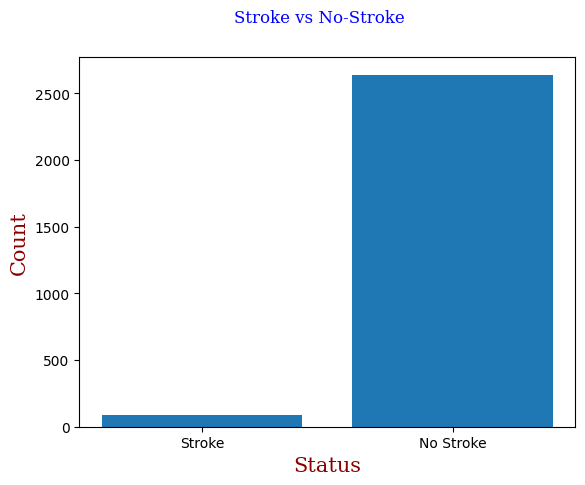

In [55]:
# dealing with the imbalanced data set
# Examine how imbalanced the dataset is by drawing a simple bar graph. Use the plot method to do this with pandas

import matplotlib.pyplot as plt  # import pyplot to draw bar graph
import numpy as np   # import numpy module

#create numpy arrays
x = np.array(['Stroke','No Stroke'])
y = np.array([86,2639])

font1 = {'family':'serif','color':'blue','fontsize':10}       # These parameters set font style and size for titles and axis
font2 = {'family':'serif','color':'darkred','fontsize':15}

plt.suptitle("Stroke vs No-Stroke",fontdict = font1)     #fontdict assigns specified font styles to heading 
plt.xlabel("Status",fontdict = font2) # assign x label
plt.ylabel("Count",fontdict = font2) # assign y label

plt.bar(x,y)   # assign x and y to bar graph function
plt.show()     # plot the function

In [56]:
import pandas as pd
from imblearn.over_sampling import SMOTE

X_sample = df_cleaned_normal.drop(columns=['stroke'])
Y_sample = df_cleaned_normal ['stroke']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_sample, Y_sample)





In [57]:
# Count the outcomes to see if data is a balanced

print(pd.Series(y_train_resampled).value_counts())  # pd.series is for handling one dimensional data in pandas
# can see that SMOTE indeed balanced the dataset

stroke
0    2639
1    2639
Name: count, dtype: int64


#### 4.5. Dimensional Reduction (PCA)

In [59]:
# for continuous target - we will use PCA which maintaince the variance and linear relationship between features and targets

from sklearn.decomposition import PCA
import numpy as np


# Assume df is your DataFrame with features
XPCA_train = X_train_resampled
XPCA_val = df_cleaned_val.drop('stroke', axis=1)
XPCA_test = df_cleaned_test.drop('stroke', axis=1)

# Apply PCA
pca = PCA()
X_pca_train = pca.fit_transform(XPCA_train)
y_pca_train = y_train_resampled
X_pca_val = pca.fit_transform(XPCA_val)
y_pca_val = df_cleaned_val['stroke']
X_pca_test = pca.fit_transform(XPCA_test)
y_pca_test = df_cleaned_test['stroke']

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Determine the number of components to capture 95% variance
# 5% loss 
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of components for 95% variance:", num_components)

Number of components for 95% variance: 2


## 5: Model Development

#### 5.1. Split train into train and validation set

Splitting already done prior

#### 5.2. Model Training and Tuning

#### 5.2.1.XGBoost

In [65]:
# Model 1: XGB Classifier
# install XGBoost
!pip3 install xgboost



In [66]:
from xgboost import XGBClassifier  # different library from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb=XGBClassifier()    #call model
# Initialize GridSearchCV with parameters and cross-validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=k_fold, scoring='f1_weighted')

# Fit GridSearchCV to training data
xgb_grid.fit(X_pca_train, y_pca_train)

# Evaluate the best estimator on the validation set (X_val, y_val) and see if need to tune parameters more before evaluation phase
Accuracy = xgb_grid.best_estimator_.score(X_pca_val, y_pca_val)  # only measure that doesn't require you to calculate y_pred

# Predict labels on the validation set
y_pred_val = xgb_grid.best_estimator_.predict(X_pca_val)
 

Precision = precision_score(y_pca_val, y_pred_val, average='weighted',zero_division=1) 
Recall = recall_score(y_pca_val, y_pred_val, average='weighted',zero_division=1)
f1 = f1_score(y_pca_val, y_pred_val, average='weighted',zero_division=1)


# Display best parameters and best estimator
print(xgb_grid.best_params_)
print(xgb_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)



{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)
Accuracy: 0.9042709867452136
Precision: 0.947961684069265
Recall: 0.9042709867452136
f1: 0.9246791612249238


In [67]:
# check against the train set for overfitting and underfitting

Accuracy = xgb_grid.best_estimator_.score(X_pca_train, y_pca_train)  
y_pred = xgb_grid.best_estimator_.predict(X_pca_train)
 

Precision = precision_score(y_pca_train, y_pred, average='weighted',zero_division=1) 
Recall = recall_score(y_pca_train, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_pca_train, y_pred, average='weighted',zero_division=1)


# Display best parameters and best estimator
print(xgb_grid.best_params_)
print(xgb_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1: 1.0


In [68]:
# no overfitting or underfitting

#### 5.2.2.Log Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2']  # Regularization type
}

# Instantiate Logistic Regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Initialize GridSearchCV with parameters and cross-validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
log_reg_grid = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=k_fold, scoring='f1_weighted')

# Fit GridSearchCV to training data
log_reg_grid.fit(X_pca_train, y_pca_train)

# Evaluate the best estimator on the validation set (X_val, y_val)
accuracy = log_reg_grid.best_estimator_.score(X_pca_val, y_pca_val)

# Predict labels on the validation set
y_pred_val = log_reg_grid.best_estimator_.predict(X_pca_val)

# Compute precision, recall, and f1-score on the validation set
precision = precision_score(y_pca_val, y_pred_val, average='weighted', zero_division=1)
recall = recall_score(y_pca_val, y_pred_val, average='weighted', zero_division=1)
f1 = f1_score(y_pca_val, y_pred_val, average='weighted', zero_division=1)

# Display best parameters and best estimator
print("Best Parameters:", log_reg_grid.best_params_)
print("Best Estimator:", log_reg_grid.best_estimator_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Estimator: LogisticRegression(C=10, max_iter=1000)
Accuracy: 0.5375552282768777
Precision: 0.9322075808076893
Recall: 0.5375552282768776
F1 Score: 0.676723751228394


In [71]:
# check against the train set for overfitting and underfitting

Accuracy = log_reg_grid.best_estimator_.score(X_pca_train, y_pca_train)  
y_pred = log_reg_grid.best_estimator_.predict(X_pca_train)
 

Precision = precision_score(y_pca_train, y_pred, average='weighted',zero_division=1) 
Recall = recall_score(y_pca_train, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_pca_train, y_pred, average='weighted',zero_division=1)


# Display best parameters and best estimator
print(log_reg_grid.best_params_)
print(log_reg_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'C': 10, 'penalty': 'l2'}
LogisticRegression(C=10, max_iter=1000)
Accuracy: 0.8088291019325502
Precision: 0.8105597102423617
Recall: 0.8088291019325502
f1: 0.8085624032230379


#### 5.2.3.Random Forests

In [73]:
from sklearn.ensemble import RandomForestClassifier
# Define the parameters grid for Random Forest
parameters = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with parameters and cross-validation (e.g., KFold)
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_grid = GridSearchCV(rf, parameters, cv=k_fold,scoring='f1_weighted')

# Fit GridSearchCV to filtered training data (X_val should be the training data, y_val should be the labels)
rf_grid.fit(X_pca_train, y_pca_train)

# Evaluate the best estimator on the validation set (X_val, y_val) and see if need to tune parameters more before evaluation phase
Accuracy = rf_grid.best_estimator_.score(X_pca_val, y_pca_val)  # only measure that doesn't require you to calculate y_pred

# Predict labels on the test set
y_pred_val = rf_grid.best_estimator_.predict(X_pca_val)
 

Precision = precision_score(y_pca_val, y_pred_val, average='weighted',zero_division=1) 
Recall = recall_score(y_pca_val, y_pred_val, average='weighted',zero_division=1)
f1 = f1_score(y_pca_val, y_pred_val, average='weighted')


# Display best parameters and best estimator
print(rf_grid.best_params_)
print(rf_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(random_state=42)
Accuracy: 0.9646539027982327
Precision: 0.9417880325096819
Recall: 0.9646539027982327
f1: 0.9530838409955552


In [74]:
# lets do a test for overfitting and underfitting
# will do this by comparing the perfomance of the train set and the validation set


Accuracy = rf_grid.best_estimator_.score(X_pca_train, y_pca_train)  
y_pred = rf_grid.best_estimator_.predict(X_pca_train)
 

Precision = precision_score(y_pca_train, y_pred, average='weighted',zero_division=1) 
Recall = recall_score(y_pca_train, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_pca_train, y_pred, average='weighted',zero_division=1)


# Display best parameters and best estimator
print(rf_grid.best_params_)
print(rf_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(random_state=42)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1: 1.0


##### 5.2.4. K Nearest Neighbours

In [76]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'p': [1, 2]  # Distance metric: 1 (Manhattan distance), 2 (Euclidean distance)
}

# Instantiate KNN Model
knn = KNeighborsClassifier()

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
knn_grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=k_fold, scoring='f1_weighted')

knn_grid.fit(X_pca_train, y_pca_train)


accuracy = knn_grid.best_estimator_.score(X_pca_val, y_pca_val)

y_pred_val = knn_grid.best_estimator_.predict(X_pca_val)

precision = precision_score(y_pca_val, y_pred_val, average='weighted', zero_division=1)
recall = recall_score(y_pca_val, y_pred_val, average='weighted', zero_division=1)
f1 = f1_score(y_pca_val, y_pred_val, average='weighted', zero_division=1)


# Display best parameters and best estimator
print(knn_grid.best_params_)
print(knn_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'n_neighbors': 3, 'p': 1}
KNeighborsClassifier(n_neighbors=3, p=1)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1: 0.8215191283281905


In [77]:
# lets do a test for overfitting and underfitting
# will do this by comparing the perfomance of the train set and the validation set


Accuracy = knn_grid.best_estimator_.score(X_pca_train, y_pca_train)  
y_pred = knn_grid.best_estimator_.predict(X_pca_train)
 

Precision = precision_score(y_pca_train, y_pred, average='weighted',zero_division=1) 
Recall = recall_score(y_pca_train, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_pca_train, y_pred, average='weighted',zero_division=1)


# Display best parameters and best estimator
print(knn_grid.best_params_)
print(knn_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'n_neighbors': 3, 'p': 1}
KNeighborsClassifier(n_neighbors=3, p=1)
Accuracy: 0.9802955665024631
Precision: 0.9810141536058025
Recall: 0.9802955665024631
f1: 0.9802882046390834


#### 5.2.5.Artificial Neural Network (ANN)

In [79]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import keras_tuner as kt
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping

# Define the model using Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(layers.Input(shape=(X_pca_train.shape[1],)))
    
    # Add hidden layers with tunable number of layers and units
    for i in range(hp.Int('num_layers', 1, 2)):  # Reduced max_layers to 2
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=64, step=32),  # Reduced max_units
            activation='relu'
        ))
    
    # Output layer for binary classification
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model with tunable optimizer and learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')  # Reduced max_lr
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize Keras Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,  # Reduced number of epochs
    hyperband_iterations=2,  # Reduced iterations
    directory='my_dir',
    project_name='my_project'
)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Run the search for best hyperparameters
tuner.search(
    X_pca_train, y_pca_train,
    epochs=20,  # Reduced number of epochs
    validation_data=(X_pca_val, y_pca_val),
    batch_size=10,
    callbacks=[early_stopping]  # Add early stopping
)

# Get the best model and evaluate it
best_models = tuner.get_best_models(num_models=1)  # Get the best model
best_model = best_models[0]

test_loss, test_accuracy = best_model.evaluate(X_pca_val, y_pca_val)

# Predict labels on the validation set
predicted_probabilities = best_model.predict(X_pca_val)
threshold_value = 0.5
y_pred_val = (predicted_probabilities > threshold_value).astype(int)

# Evaluate the model with validation set
Precision_ann = precision_score(y_pca_val, y_pred_val, average='weighted', zero_division=1)
Recall_ann = recall_score(y_pca_val, y_pred_val, average='weighted', zero_division=1)
f1_ann = f1_score(y_pca_val, y_pred_val, average='weighted', zero_division=1)

# Display the performance metrics
print("Best Hyperparameters:", tuner.get_best_hyperparameters()[0].values)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Precision:", Precision_ann)
print("Recall:", Recall_ann)
print("F1-score:", f1_ann)



Reloading Tuner from my_dir\my_project\tuner0.json



C:\Users\Pragesh.govender\Anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9673 - loss: 14.7721 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Best Hyperparameters: {'num_layers': 1, 'units_0': 128, 'learning_rate': 0.016861880182742043, 'units_1': 32, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 3, 'tuner/round': 0}
Test Accuracy: 97.05%
Precision: 0.9714125207953305
Recall: 0.9705449189985272
F1-score: 0.9560375211061726


In [85]:
# test for overfitting and underfitting

# Predict labels on the test set
predicted_probabilities = best_model.predict(X_pca_train)
threshold_value = 0.5  # Default threshold
# output is continuous so have to convert to discrete based on threshold value
y_pred_test = (predicted_probabilities > threshold_value).astype(int)  # Binary conversion

# Evaluate the model with train set
test_loss, test_accuracy = best_model.evaluate(X_pca_train, y_pca_train)
Precision_ann = precision_score(y_pca_train, y_pred_test, average='weighted', zero_division=1)
Recall_ann = recall_score(y_pca_train, y_pred_test, average='weighted', zero_division=1)
f1_ann = f1_score(y_pca_train, y_pred_test, average='weighted', zero_division=1)

# Display the performance metrics
print("Precision (RNN):", Precision_ann)
print("Recall (RNN):", Recall_ann)
print("F1-score (RNN):", f1_ann)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9388 - loss: 0.1427
Precision (RNN): 0.9274584061537045
Recall (RNN): 0.9270557029177718
F1-score (RNN): 0.9270385188923101
Test Accuracy: 92.71%


#### 5.2.6. Isolation Forest (Anomaly detection)

In [87]:

# anomoly detection algorithm work with imblanced datasets - so use X and y prior to SMOTE
# Other steps like PCA, outlier removal and normalization is fine

X_anomaly_train = df_cleaned_normal.drop(columns=['stroke'])
Y_anomaly_train = df_cleaned_normal ['stroke']
X_anomaly_val = df_cleaned_normal_val.drop(columns=['stroke'])
Y_anomaly_val = df_cleaned_normal_val ['stroke']
X_anomaly_test = df_cleaned_normal_test.drop(columns=['stroke'])
Y_anomaly_test = df_cleaned_normal_test ['stroke']


from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import precision_score, recall_score, f1_score

# Define parameter grid for Isolation Forest
param_grid = {
    'n_estimators': [50, 100, 150],   # Number of trees
    'max_samples': ['auto', 0.8, 0.9],  # Number of samples to draw
    'contamination': [0.1, 0.2, 0.3],   # Proportion of anomalies in the data
    'max_features': [1.0, 0.8, 0.9]     # Number of features to use
}

# Instantiate the Isolation Forest model
iso_forest = IsolationForest(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
iso_grid = GridSearchCV(estimator=iso_forest, param_grid=param_grid, cv=k_fold, scoring='f1_weighted', n_jobs=-1)

# Fit the model on the training data (no target labels required)
iso_grid.fit(X_anomaly_train)  # Only pass X

# Make predictions on validation data
y_pred_val = iso_grid.best_estimator_.predict(X_anomaly_val)

# Convert anomaly predictions (-1 for anomaly, 1 for normal) to binary format (1 for anomaly, 0 for normal)
y_pred_val = [1 if x == -1 else 0 for x in y_pred_val]

# Assuming y_val contains labels with 1 for anomaly and 0 for normal (ground truth for evaluation)
# Calculate precision, recall, and f1-score
precision = precision_score(Y_anomaly_val, y_pred_val, average='weighted', zero_division=1)
recall = recall_score(Y_anomaly_val, y_pred_val, average='weighted', zero_division=1)
f1 = f1_score(Y_anomaly_val, y_pred_val, average='weighted', zero_division=1)

# Display best parameters and performance metrics
print(iso_grid.best_params_)
print(iso_grid.best_estimator_)
print("Precision:", precision)
print("Recall:", recall)
print("f1:", f1)


C:\Users\Pragesh.govender\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


{'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 50}
IsolationForest(contamination=0.1, n_estimators=50, random_state=42)
Precision: 0.9466637044185896
Recall: 0.8777614138438881
f1: 0.9095548752665572


In [89]:
#overfitting and underfitting

y_pred_train = iso_grid.best_estimator_.predict(X_anomaly_train)

# Convert anomaly predictions (-1 for anomaly, 1 for normal) to binary format (1 for anomaly, 0 for normal)
y_pred_train = [1 if x == -1 else 0 for x in y_pred_train]

precision = precision_score(Y_anomaly_train, y_pred_train, average='weighted', zero_division=1)
recall = recall_score(Y_anomaly_train, y_pred_train, average='weighted', zero_division=1)
f1 = f1_score(Y_anomaly_train, y_pred_train, average='weighted', zero_division=1)

# Display best parameters and performance metrics
print(iso_grid.best_params_)
print(iso_grid.best_estimator_)
print("Precision:", precision)
print("Recall:", recall)
print("f1:", f1)

{'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 50}
IsolationForest(contamination=0.1, n_estimators=50, random_state=42)
Precision: 0.9497907339827808
Recall: 0.8902752293577981
f1: 0.9168373951397188


## 6: Model Evaluation

#### 6.1. Mean Accuracy

In [91]:
print('xgb_grid:',round(xgb_grid.best_estimator_.score(X_pca_test, y_pca_test),2))

xgb_grid: 0.93


#### 6.2. Classification Report


##### 6.2.1. Xgboost

In [93]:
from sklearn.metrics import classification_report

# Use the best estimator obtained from GridSearchCV
best_xgb = xgb_grid.best_estimator_

# Predict labels on the test set
predicted_labels = best_xgb.predict(X_pca_test)

#can try to adjust thresholds - still doesn't improve positive case identification
#predicted_labels= model.predict_proba(X_test)[:, 1]
#threshold_value = 0.3
#y_pred_adjusted = (predicted_labels > threshold_value).astype(int)

# Generate a classification report
report = classification_report(y_pca_test, predicted_labels, output_dict=True,zero_division=1)

# Convert the report dictionary to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Adjust pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Print the report in table form with averages
print("Classification Report:")
print(df_report)

Classification Report:
              precision    recall  f1-score     support
0              0.968331  0.963636  0.965978  825.000000
1              0.090909  0.103448  0.096774   29.000000
accuracy       0.934426  0.934426  0.934426    0.934426
macro avg      0.529620  0.533542  0.531376  854.000000
weighted avg   0.938536  0.934426  0.936462  854.000000


The results shows that the positive class peforms poorly. This could be due to an imbalanced test set. Need to collect more data of positive class. 

##### 6.2.2. Log regression

In [95]:
from sklearn.metrics import classification_report

# Use the best estimator obtained from GridSearchCV
best_log_reg = log_reg_grid.best_estimator_

# Predict labels on the test set
predicted_labels = best_log_reg.predict(X_pca_test)

#can try to adjust thresholds - still doesn't improve positive case identification
#predicted_labels= model.predict_proba(X_test)[:, 1]
#threshold_value = 0.3
#y_pred_adjusted = (predicted_labels > threshold_value).astype(int)

# Generate a classification report
report = classification_report(y_pca_test, predicted_labels, output_dict=True,zero_division=1)

# Convert the report dictionary to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Adjust pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Print the report in table form with averages
print("Classification Report:")
print(df_report)

Classification Report:
              precision    recall  f1-score     support
0              0.997642  0.512727  0.677342  825.000000
1              0.065116  0.965517  0.122004   29.000000
accuracy       0.528103  0.528103  0.528103    0.528103
macro avg      0.531379  0.739122  0.399673  854.000000
weighted avg   0.965975  0.528103  0.658484  854.000000


##### 6.2.3. Random Forest

In [97]:
from sklearn.metrics import classification_report

# Use the best estimator obtained from GridSearchCV
best_rf = rf_grid.best_estimator_

# Predict labels on the test set
predicted_labels = best_rf.predict(X_pca_test)

#can try to adjust thresholds - still doesn't improve positive case identification
#predicted_labels= model.predict_proba(X_test)[:, 1]
#threshold_value = 0.3
#y_pred_adjusted = (predicted_labels > threshold_value).astype(int)

# Generate a classification report
report = classification_report(y_pca_test, predicted_labels, output_dict=True,zero_division=1)

# Convert the report dictionary to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Adjust pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Print the report in table form with averages
print("Classification Report:")
print(df_report)

Classification Report:
              precision    recall  f1-score     support
0              0.965721  0.990303  0.977858  825.000000
1              0.000000  0.000000  0.000000   29.000000
accuracy       0.956674  0.956674  0.956674    0.956674
macro avg      0.482861  0.495152  0.488929  854.000000
weighted avg   0.932927  0.956674  0.944652  854.000000


##### 6.2.4. K nearest neighbours

In [99]:
# Use the best estimator obtained from GridSearchCV
best_knn = knn_grid.best_estimator_

# Predict labels on the test set
predicted_labels = best_knn.predict(X_pca_test)

#can try to adjust thresholds - still doesn't improve positive case identification
#predicted_labels= model.predict_proba(X_test)[:, 1]
#threshold_value = 0.3
#y_pred_adjusted = (predicted_labels > threshold_value).astype(int)

# Generate a classification report
report = classification_report(y_pca_test, predicted_labels, output_dict=True,zero_division=1)

# Convert the report dictionary to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Adjust pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Print the report in table form with averages
print("Classification Report:")
print(df_report)

Classification Report:
              precision    recall  f1-score     support
0              0.982866  0.764848  0.860259  825.000000
1              0.084906  0.620690  0.149378   29.000000
accuracy       0.759953  0.759953  0.759953    0.759953
macro avg      0.533886  0.692769  0.504818  854.000000
weighted avg   0.952373  0.759953  0.836119  854.000000


#### 6.2.5. ANN

In [101]:
# Predict labels on the test set
predicted_probabilities = best_model.predict(X_pca_test)
threshold_value = 0.5  # Default threshold
# output is continuous so have to convert to discrete based on threshold value
predicted_labels = (predicted_probabilities > threshold_value).astype(int)  # Binary conversion

#can try to adjust thresholds - still doesn't improve positive case identification
#predicted_labels= model.predict_proba(X_test)[:, 1]
#threshold_value = 0.3
#y_pred_adjusted = (predicted_labels > threshold_value).astype(int)

# Generate a classification report
report = classification_report(y_pca_test, predicted_labels, output_dict=True,zero_division=1)

# Convert the report dictionary to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Adjust pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Print the report in table form with averages
print("Classification Report:")
print(df_report)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Classification Report:
              precision    recall  f1-score     support
0              0.966002  0.998788  0.982122  825.000000
1              0.000000  0.000000  0.000000   29.000000
accuracy       0.964871  0.964871  0.964871    0.964871
macro avg      0.483001  0.499394  0.491061  854.000000
weighted avg   0.933199  0.964871  0.948771  854.000000


#### 6.2.6. Isolation Forest (Anamoly Detection)

In [103]:
from sklearn.metrics import classification_report
predicted_labels = iso_grid.best_estimator_.predict(X_anomaly_test)

# Convert anomaly predictions (-1 for anomaly, 1 for normal) to binary format (1 for anomaly, 0 for normal)
predicted_labels = [1 if x == -1 else 0 for x in predicted_labels]

#can try to adjust thresholds - still doesn't improve positive case identification
#predicted_labels= model.predict_proba(X_test)[:, 1]
#threshold_value = 0.3
#y_pred_adjusted = (predicted_labels > threshold_value).astype(int)

# Generate a classification report
report = classification_report(Y_anomaly_test, predicted_labels, output_dict=True,zero_division=1)

# Convert the report dictionary to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Adjust pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Print the report in table form with averages
print("Classification Report:")
print(df_report)

Classification Report:
              precision    recall  f1-score     support
0              0.972868  0.912727  0.941839  825.000000
1              0.100000  0.275862  0.146789   29.000000
accuracy       0.891101  0.891101  0.891101    0.891101
macro avg      0.536434  0.594295  0.544314  854.000000
weighted avg   0.943227  0.891101  0.914840  854.000000


#### 6.3. Confusion Matrix

##### 6.3.1. XgBoost

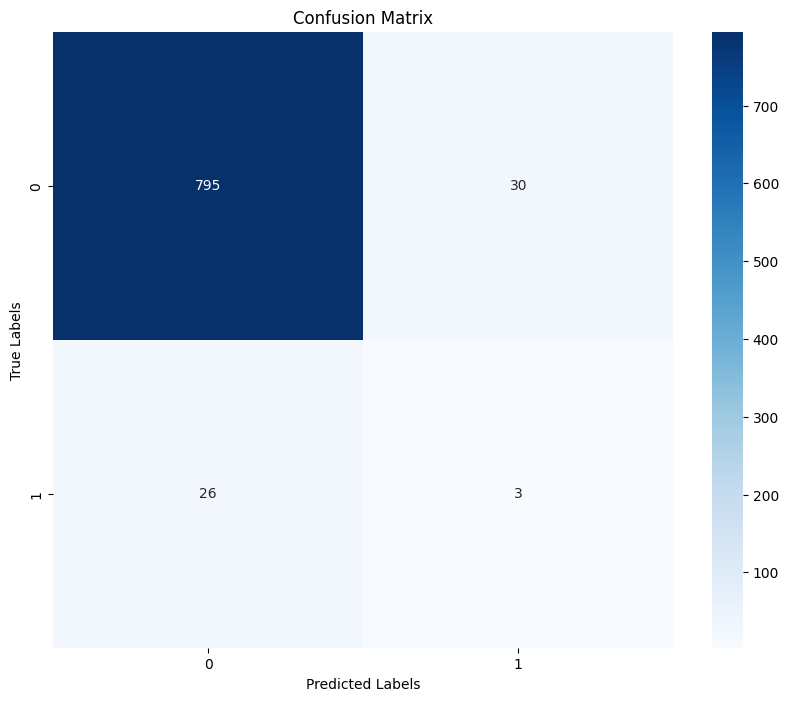

In [105]:
# xgboost is the best model
#fit with test data

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming xgb_grid.best_estimator_ is the best SVM classifier obtained from GridSearchCV
best_xgb = xgb_grid.best_estimator_

# Predict labels on the test set
y_pred = best_xgb.predict(X_pca_test)

# Get unique class labels from the predicted and true labels
classes = sorted(set(y_pca_test) | set(y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_pca_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### 6.3.2. Log Reg

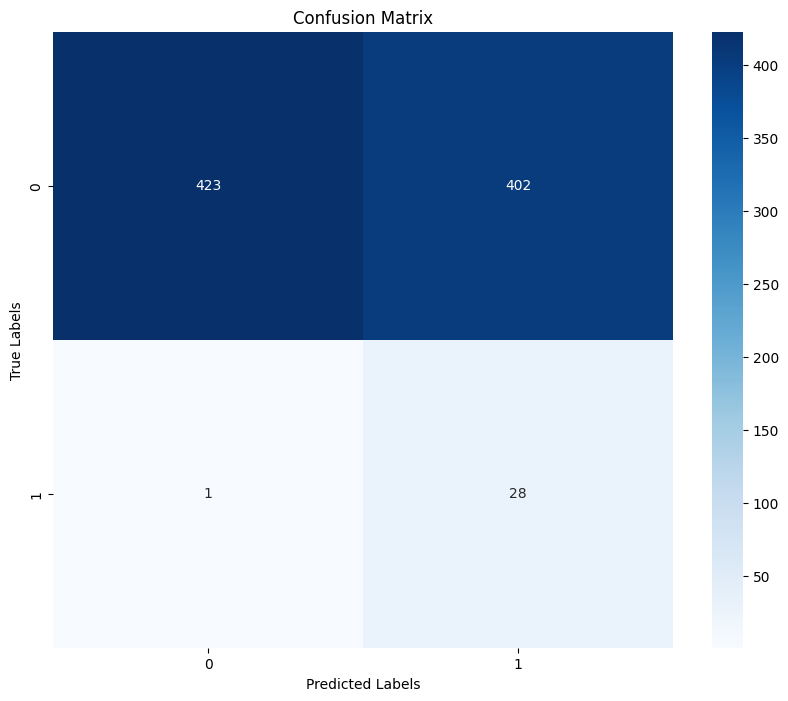

In [107]:
# for log Reg

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming log_reg_grid.best_estimator_ is the best SVM classifier obtained from GridSearchCV
best_log_reg = log_reg_grid.best_estimator_

# Predict labels on the test set
y_pred = best_log_reg.predict(X_pca_test)

# Get unique class labels from the predicted and true labels
classes = sorted(set(y_pca_test) | set(y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_pca_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### 6.3.3. Random Forest

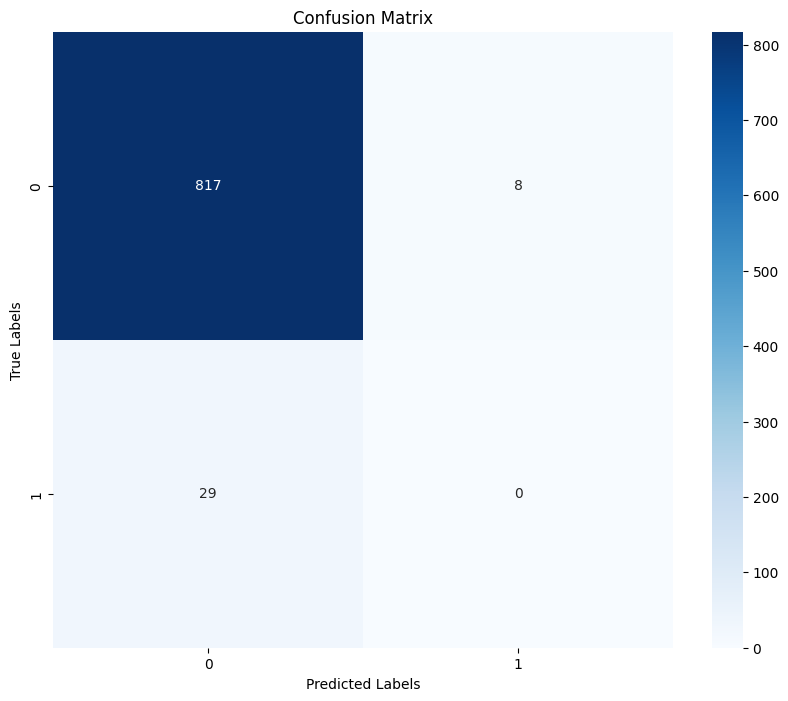

In [109]:
# for Random Forest

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming rf_grid.best_estimator_ is the best SVM classifier obtained from GridSearchCV
best_rf = rf_grid.best_estimator_

# Predict labels on the test set
y_pred = best_rf.predict(X_pca_test)

# Get unique class labels from the predicted and true labels
classes = sorted(set(y_pca_test) | set(y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_pca_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### 6.3.4. K Nearest Neighbours

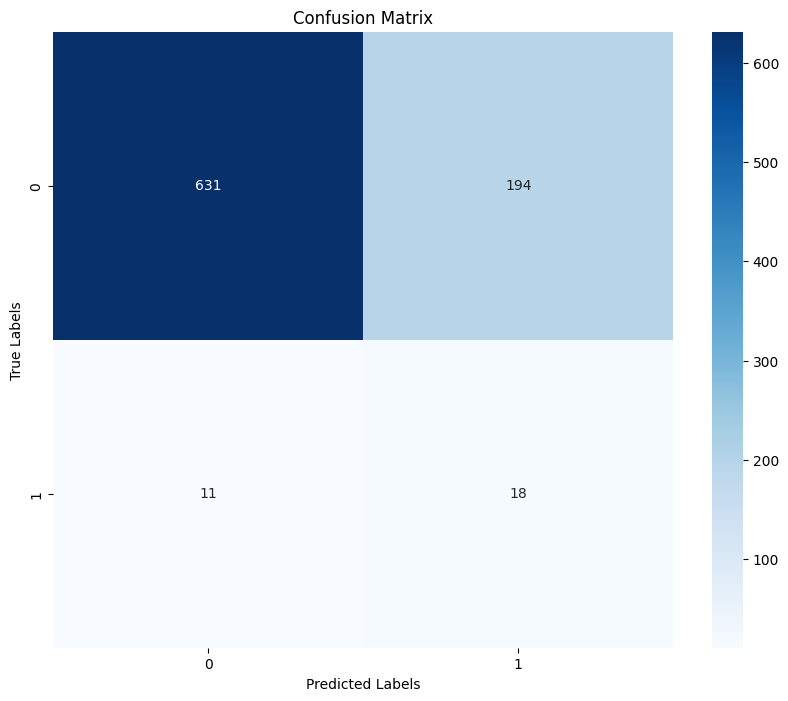

In [111]:
# for k nearest neighbours

# Assuming rf_grid.best_estimator_ is the best SVM classifier obtained from GridSearchCV
best_knn = knn_grid.best_estimator_

# Predict labels on the test set
y_pred = best_knn.predict(X_pca_test)

# Get unique class labels from the predicted and true labels
classes = sorted(set(y_pca_test) | set(y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_pca_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### 6.3.5. ANN

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


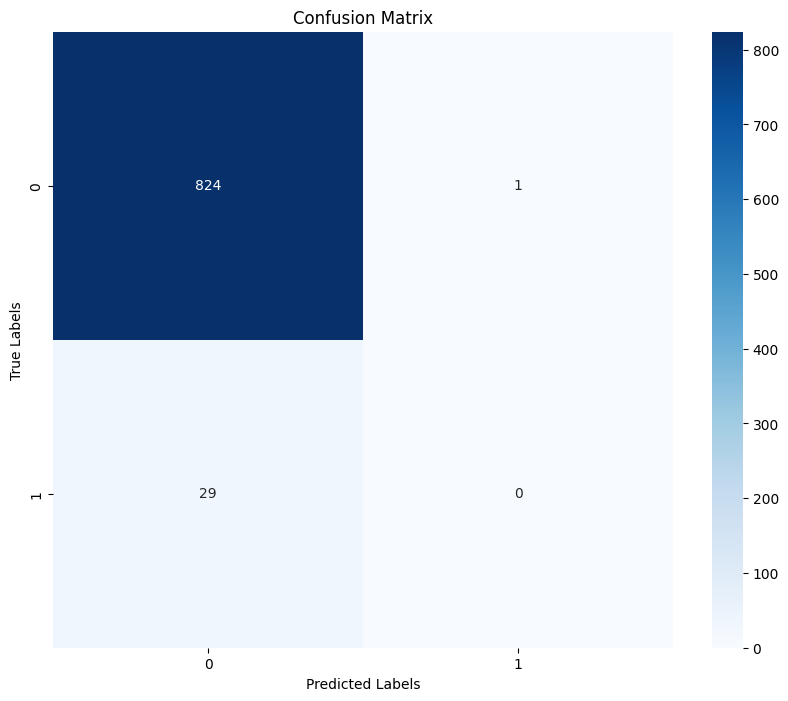

In [113]:

# Predict probabilities using the model
predicted_probabilities = best_model.predict(X_pca_test)

# Define the threshold for binary classification
threshold_value = 0.5  # Default threshold, can be adjusted if needed

# Convert the predicted probabilities to binary labels (0 or 1)
y_pred = (predicted_probabilities > threshold_value).astype(int).ravel()  # Ensure y_pred is 1D

# Ensure that y_test is also 1D
# y_test = y_test.ravel() - not necessary (already 1D)

# Check for class mismatches and get the union of unique class labels
classes = sorted(set(y_pca_test) | set(y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_pca_test, y_pred, labels=classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### 6.3.6. Isolation Forest (Anomaly Detection)

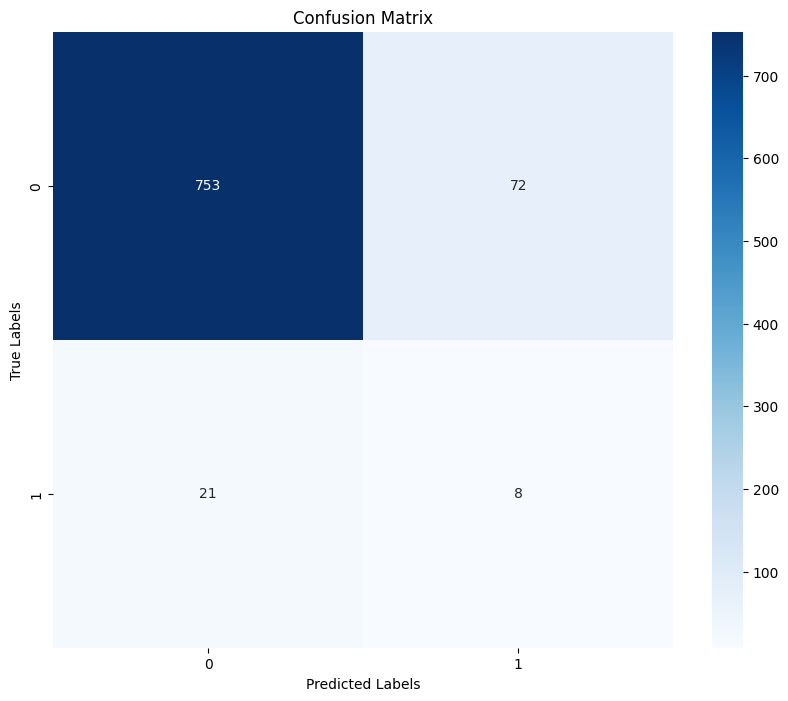

In [115]:
# for isolation forest

y_pred_test = iso_grid.best_estimator_.predict(X_anomaly_test)

# Convert anomaly predictions (-1 for anomaly, 1 for normal) to binary format (1 for anomaly, 0 for normal)
y_pred_test = [1 if x == -1 else 0 for x in y_pred_test]

# Get unique class labels from the predicted and true labels
classes = sorted(set(Y_anomaly_test) | set(y_pred))

# Compute confusion matrix
cm = confusion_matrix(Y_anomaly_test, y_pred_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Best performing model is xgboost and ANN. All model predict the possibility of stroke poorly

## 7: Model Deployment 